In [9]:
from sklearn.datasets import load_iris
import numpy as np
import pandas
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import accuracy_score
import scipy

data = load_iris()
X,Y = load_iris(return_X_y=True)
print(data.feature_names)
print(X) 
print(Y)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3

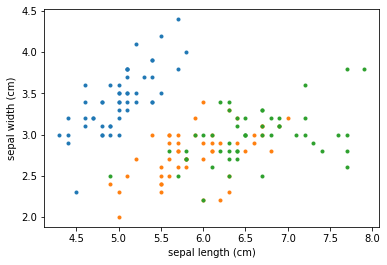

In [2]:
i = 0
j = 1
plt.figure()
plt.plot(X[Y==0,i],X[Y==0,j],'.')
plt.plot(X[Y==1,i],X[Y==1,j],'.')
plt.plot(X[Y==2,i],X[Y==2,j],'.')
plt.xlabel( data.feature_names[i] )
plt.ylabel( data.feature_names[j] )
plt.show()

In [3]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=42)
print('X',X.shape)
print('Xtrain',Xtrain.shape)
print('Xtest',Xtest.shape)

X (150, 4)
Xtrain (105, 4)
Xtest (45, 4)


# K Nearest Neighbors

In [4]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(Xtrain,ytrain)
#print('Xtrain',Xtrain)
#print('Ytrain',ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [5]:
ypred = model.predict([[6.3,2.8,4.7,0.9]])
print(ypred)

[1]


In [6]:
class MyKNN:
    def __init__(self,k = 5):
        self.k = k
        self.Xtrain = None
        self.Ytrain = None
        
    def fit(self,Xtrain,Ytrain):
        self.Xtrain = Xtrain
        self.Ytrain = Ytrain
        
    def predict(self,Xtest):
        ntrain = len(self.Xtrain)
        ntest = len(Xtest)
        ypred = np.zeros((ntest))
        for j,x in enumerate(Xtest):
            dist = np.zeros((ntrain))
            for i,xtr in enumerate(self.Xtrain):
                dist[i] = np.linalg.norm(x-xtr)
                # Norma v:   sqrt( v1**2 + v2**2 + ...)
                # Euclideana:  sqrt(  (v1-u1)**2 + (v2-u2)**2 + ...)
            idx = np.argsort(dist)
            # dist = [4.7 9.8 1.2]
            # idx = [2 0 1]
            idx = idx[:self.k]
            yknn = self.Ytrain[idx]
            ypred[j] = scipy.stats.mode(yknn)[0]
        return ypred

In [7]:
model = MyKNN(k=5)
model.fit(Xtrain,ytrain)
ypred = model.predict([[6.3,2.8,4.7,0.9]])
print(ypred)

[1.]


In [8]:
ypred = model.predict(Xtest)
print('accuracy',accuracy_score(ytest,ypred))

accuracy 1.0


# Nearest Centroid

In [12]:
model = NearestCentroid()
model.fit(Xtrain,ytrain)
ypred = model.predict([[6.3,2.8,4.7,0.9]])
print(ypred)

[1]


In [19]:
class MyNC:
    def __init__(self):
        self.centroid = None
        self.ycentroid = None
        self.nclasses = 0
        
    def fit(self,Xtrain,Ytrain):
        nsamples,nfeatures = Xtrain.shape
        yunique = np.unique(Ytrain) # [0, 1, 2]
        self.nclasses = len(yunique)
        
        self.centroid = np.zeros((self.nclasses,nfeatures))
        self.ycentroid = np.zeros((self.nclasses))
        for i,y in enumerate(yunique):
            self.ycentroid[i] = y
            self.centroid[i] = np.mean( Xtrain[Ytrain==y], axis=0)
            
    def predict(self,Xtest):
        ntest = len(Xtest)
        ypred = np.zeros((ntest))
        
        for i,x in enumerate(Xtest): # x=[6.3,2.8,4.7,0.9]
            dist = np.zeros((self.nclasses))
            for c,cent in enumerate(self.centroid):
                dist[c] = np.linalg.norm( x-cent ) 
            j = np.argmin( dist )
            ypred[i] = self.ycentroid[j]
        return ypred

model = MyNC()
model.fit(Xtrain,ytrain)
ypred = model.predict([[6.3,2.8,4.7,0.9]])
print(ypred)
ypred = model.predict(Xtest)
print('accuracy',accuracy_score(ytest,ypred))

[1.]
accuracy 0.9555555555555556


In [20]:
model = NearestCentroid()
model.fit(Xtrain,ytrain)
ypred = model.predict([[6.3,2.8,4.7,0.9]])
ypred = model.predict(Xtest)
print('accuracy',accuracy_score(ytest,ypred))

accuracy 0.9555555555555556
